In [1]:
#Data Visuals
#3/13/25
#Diya Tandel

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print(pd)

<module 'pandas' from '/opt/anaconda3/lib/python3.12/site-packages/pandas/__init__.py'>


In [5]:
data2 = pd.read_csv('theCombinedData.csv')
data2.columns = data2.columns.str.strip()

total_ridership_median = data2["Total Ridership(Median)"].str.replace(",", "").astype(int)
data2["Total Ridership(Median)"] = total_ridership_median

data2

,Month,Year,AQI(Median),Total Ridership(Median)
0,January,2019,41.0,1396540
1,February,2019,36.0,1462630
2,March,2019,39.0,1500660
3,April,2019,43.5,1525050
4,May,2019,41.0,1507300
5,June,2019,44.5,1527750
6,July,2019,43.0,1503690
7,August,2019,37.0,1526830
8,September,2019,30.5,1569180
9,October,2019,52.0,1570340


In [6]:
for columnName in data2.columns:
    print(columnName)

Month
Year
AQI(Median)
Total Ridership(Median)


<Axes: xlabel='AQI(Median)', ylabel='Total Ridership(Median)'>

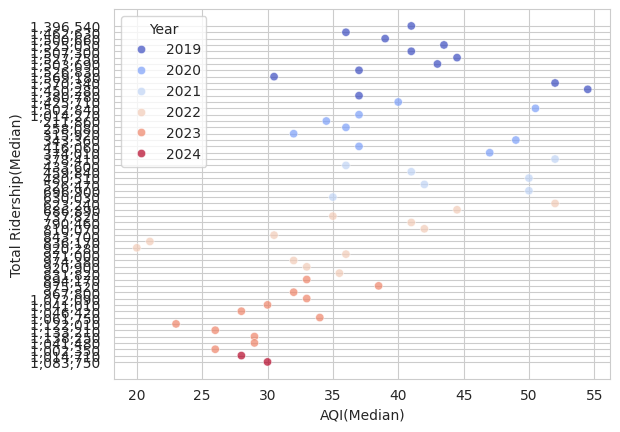

In [5]:
sns.scatterplot(x=data2["AQI(Median)"], y=data2["Total Ridership(Median)"], hue=data2["Year"], palette="coolwarm", alpha=0.7)

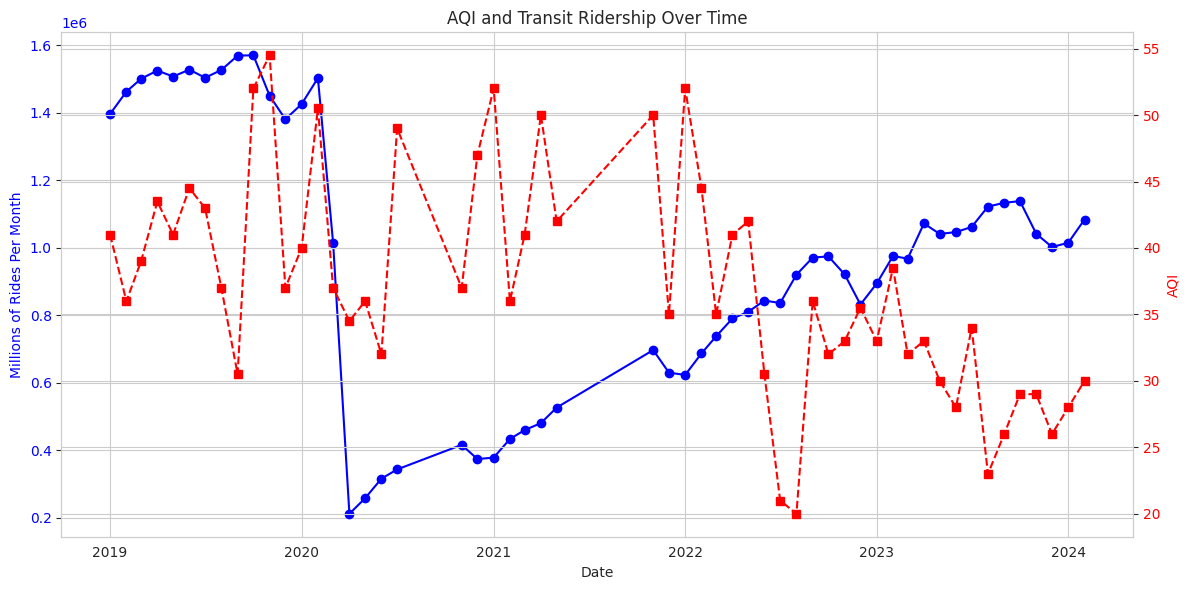

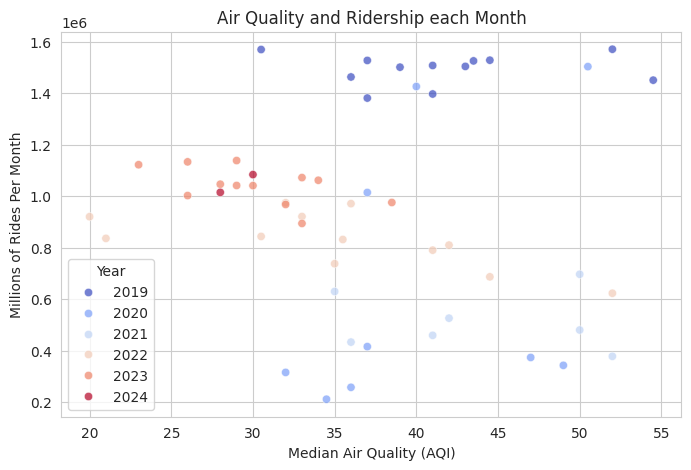

In [9]:
mrpm_y_label = "Millions of Rides Per Month"
month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}
data2["month"] = data2["Month"].map(month_mapping)

data2["AQI(Median)"] = pd.to_numeric(data2["AQI(Median)"], errors='coerce')

data2["date"] = pd.to_datetime(data2["Year"].astype(str) + "-" + data2["month"].astype(str), format="%Y-%m")

data2 = data2.sort_values("date")

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel("Date")
ax1.set_ylabel(mrpm_y_label, color="b")
ax1.plot(data2["date"], total_ridership_median, marker="o", color="b", label="Total Ridership")
ax1.tick_params(axis="y", labelcolor="b")

ax2 = ax1.twinx()
ax2.set_ylabel("AQI", color="r")
ax2.plot(data2["date"], data2["AQI(Median)"], marker="s", linestyle="dashed", color="r", label="AQI")
ax2.tick_params(axis="y", labelcolor="r")


plt.title("AQI and Transit Ridership Over Time")
fig.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=data2["AQI(Median)"], y=total_ridership_median, hue=data2["Year"], palette="coolwarm", alpha=0.7)


sns.regplot(x=data2["AQI(Median)"], y=total_ridership_median, scatter=False, color="black", fit_reg=False)

plt.xlabel("Median Air Quality (AQI)")
plt.ylabel(mrpm_y_label)
plt.title("Air Quality and Ridership each Month")
plt.grid(True)
plt.show()


In [13]:
coeffiecients = np.polyfit(data2["Total Ridership(Median)"], data2["AQI(Median)"], 1)
y_pred = np.polyval(coeffiecients, data2["Total Ridership(Median)"])

# R-squared
ss_t = np.sum((data2["AQI(Median)"]-np.mean(data2["AQI(Median)"]))**2)
ss_residual = np.sum((data2["AQI(Median)"]-y_pred)**2)
r2 = 1 - (ss_residual/ ss_t)

print(r2)

0.0008000507069355622


In [15]:
np.round(np.sqrt(r2), 4)

0.0283